<a href="https://colab.research.google.com/github/sebasveos/Trabajo_3_Aprendizaje_De_Maquinas/blob/main/Trabajo%20Final%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [3]:
ruta = "https://drive.google.com/file/d/1N52KIff7aW87pwSqA2PTMc3Sz8onKnXH/view?usp=drive_link"
file_id = ruta.split('/')[-2]
url = f"https://drive.google.com/uc?id={file_id}"

data = gdown.download(url, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1N52KIff7aW87pwSqA2PTMc3Sz8onKnXH
To: /content/data.csv
100%|██████████| 1.48M/1.48M [00:00<00:00, 24.4MB/s]


In [4]:
data = pd.read_csv(data)
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
print(f"tamaño antes{data.shape}")
data.dropna(inplace=True)
print(f"tamaño despues{data.shape}")

tamaño antes(11914, 16)
tamaño despues(8084, 16)


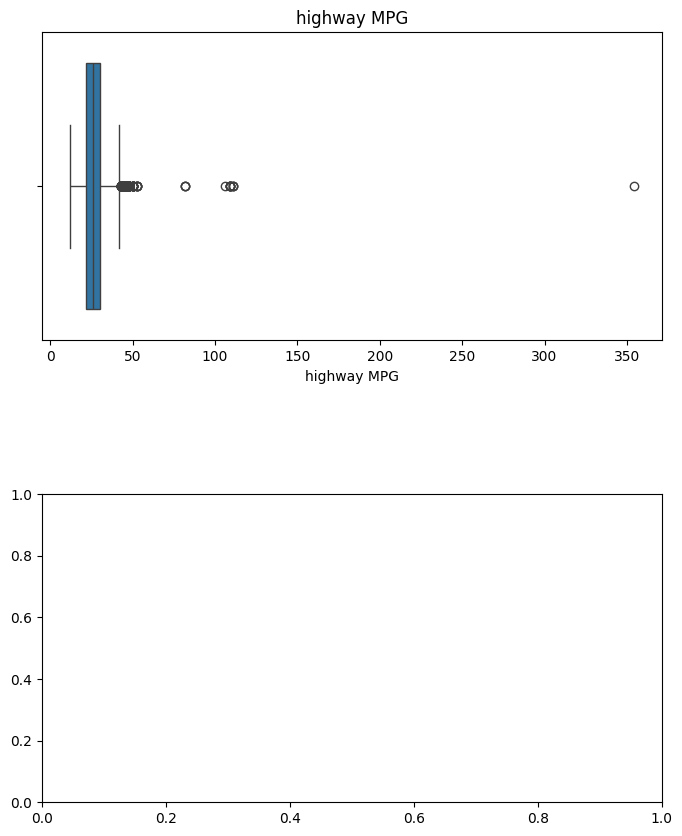

In [7]:
cols_num = ['highway MPG']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

In [8]:
cols_cat = ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors',
       'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg',
       'Popularity', 'MSRP']


for col in cols_cat:
    print(f'{col}: {data[col].nunique()} subniveles')

Make: 47 subniveles
Model: 713 subniveles
Year: 28 subniveles
Engine Fuel Type: 8 subniveles
Engine HP: 327 subniveles
Engine Cylinders: 9 subniveles
Transmission Type: 5 subniveles
Driven_Wheels: 4 subniveles
Number of Doors: 3 subniveles
Market Category: 70 subniveles
Vehicle Size: 3 subniveles
Vehicle Style: 16 subniveles
highway MPG: 44 subniveles
city mpg: 50 subniveles
Popularity: 47 subniveles
MSRP: 4644 subniveles


In [9]:
for col in cols_cat:
    print(data[col].value_counts())
    print('-'*20)

Make
Chevrolet        614
Volkswagen       581
Ford             492
Cadillac         397
Mercedes-Benz    352
BMW              334
Infiniti         330
Audi             328
Dodge            320
Nissan           308
Toyota           300
Honda            282
Volvo            281
GMC              270
Acura            252
Mazda            239
Subaru           214
Hyundai          214
Lexus            202
Lincoln          156
Land Rover       143
Porsche          136
Mitsubishi       125
Buick            125
Saab             111
Kia              109
Chrysler         108
Suzuki            99
Aston Martin      93
Pontiac           77
Bentley           74
Ferrari           68
Maserati          58
Lamborghini       52
Scion             48
Plymouth          39
FIAT              38
Rolls-Royce       31
Lotus             29
HUMMER            17
Maybach           16
Alfa Romeo         5
McLaren            5
Spyker             3
Genesis            3
Oldsmobile         3
Bugatti            3
Name: co

In [10]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (8084, 16)
Tamaño del set después de eliminar las filas repetidas: (7735, 16)


In [11]:
data_encoded = data.copy()
data_encoded['Size_encoded'] = data_encoded['Vehicle Size'].astype('category').cat.codes
data_encoded['Style_encoded'] = data_encoded['Vehicle Style'].astype('category').cat.codes
data_encoded['Market_encoded'] = data_encoded['Market Category'].astype('category').cat.codes
data_encoded['Make_encoded'] = data_encoded['Make'].astype('category').cat.codes
data_encoded['Wheels_encoded'] = data_encoded['Driven_Wheels'].astype('category').cat.codes
data_encoded['Transmission_encoded'] = data_encoded['Transmission Type'].astype('category').cat.codes
data_encoded['Fuel_encoded'] = data_encoded['Engine Fuel Type'].astype('category').cat.codes

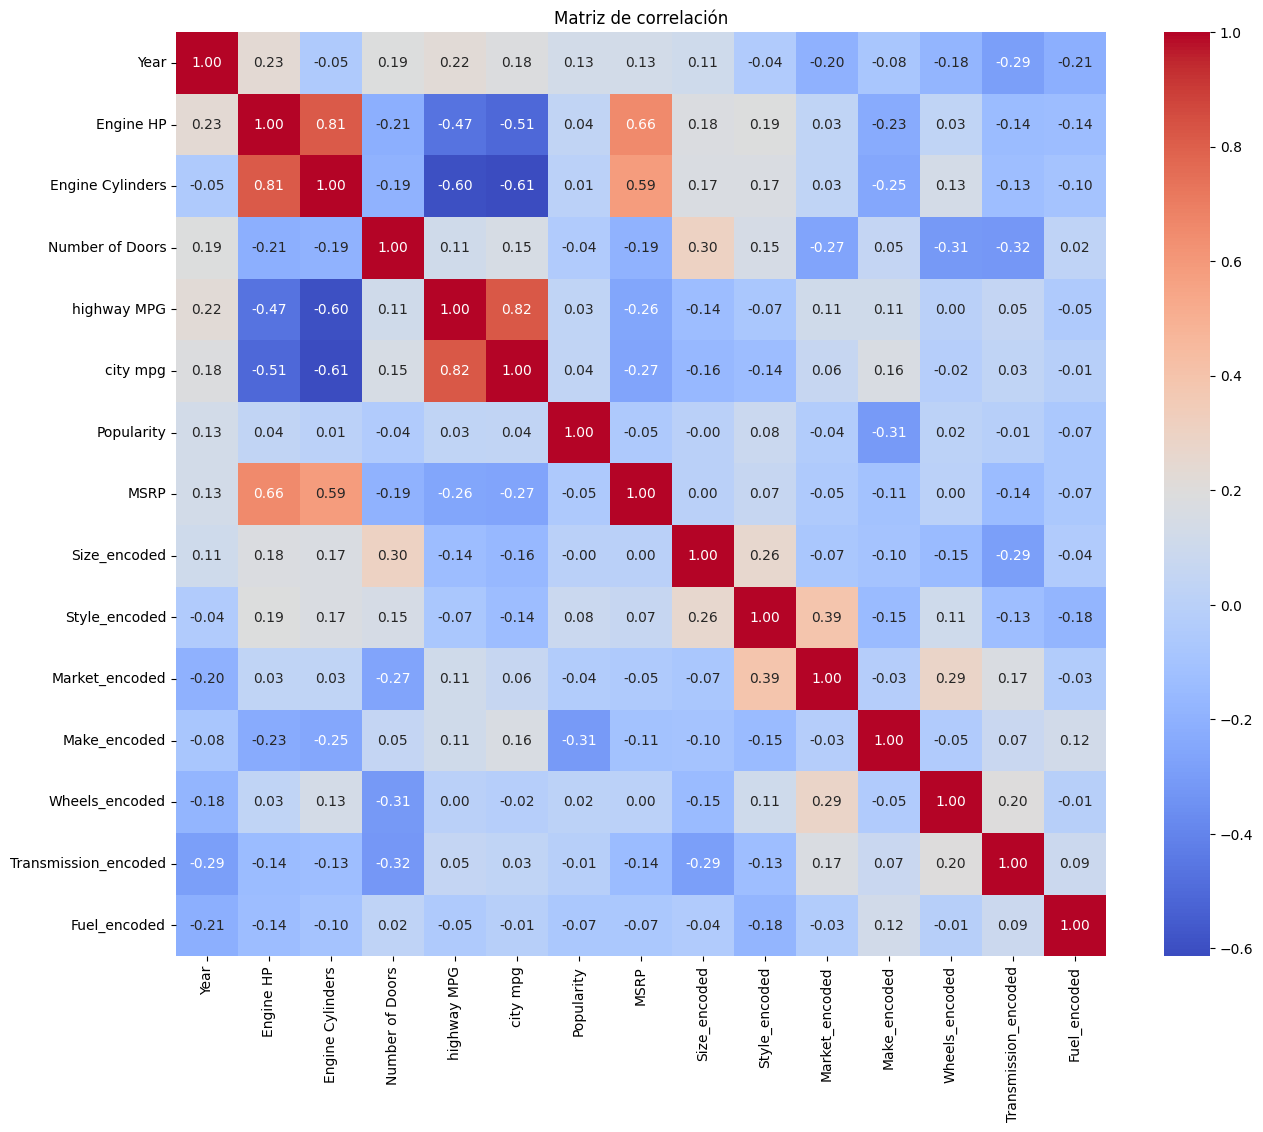

In [12]:
corr_matrix = data_encoded.corr(numeric_only=True)


plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [13]:
print(data.dtypes)

data.select_dtypes(include='object').nunique()

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


,0
Make,47
Model,713
Engine Fuel Type,8
Transmission Type,5
Driven_Wheels,4
Market Category,70
Vehicle Size,3
Vehicle Style,16


Vehicle Size
Midsize    3043
Compact    2847
Large      1845
Name: count, dtype: int64


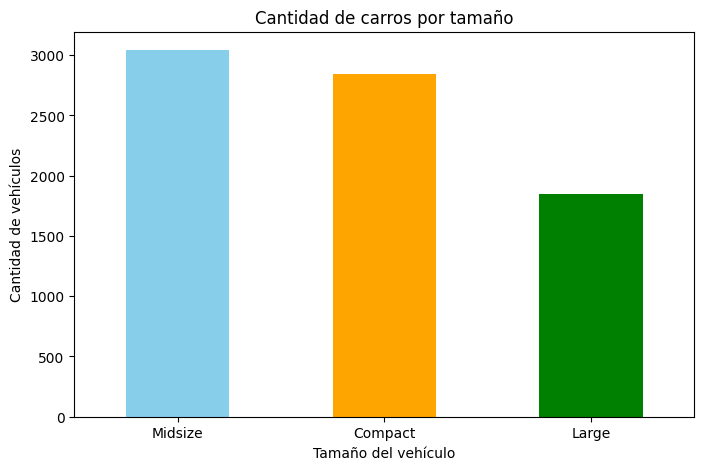

In [14]:
counts = data['Vehicle Size'].value_counts()


print(counts)


plt.figure(figsize=(8,5))
counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Cantidad de carros por tamaño')
plt.xlabel('Tamaño del vehículo')
plt.ylabel('Cantidad de vehículos')
plt.xticks(rotation=0)
plt.show()

In [15]:
X= data[['Driven_Wheels', 'Vehicle Style',
         'Number of Doors', 'Transmission Type', 'Market Category',
         'city mpg', 'highway MPG', 'Engine Cylinders']]

Y= data['Vehicle Size']

Y_encoded = Y.astype('category').cat.codes

X_encoded = pd.get_dummies(X, drop_first=True)

X_temp, X_test, y_temp, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [16]:
print("Clases y conteo en y_train:")
counts = Counter(y_train)
print(counts)

counts = data['Vehicle Size'].value_counts()


print(counts)

Clases y conteo en y_train:
Counter({2: 1823, 0: 1703, 1: 1115})
Vehicle Size
Midsize    3043
Compact    2847
Large      1845
Name: count, dtype: int64


**Aplicación del modelo**

los hiper-parametros sacados del orange son:

Número de árboles: 10

Máxima profundidad: automática

Criterio de división: Gini

Muestras mínimas por hoja: automáticas

Validación cruzada: 5 folds

Repeticiones: 10

Proporción del set de entrenamiento: 66

In [17]:
print('Numero de muestras en y:', np.bincount(Y_encoded))
print('Numero de muestras en y_train:', np.bincount(y_train))
print('Numero de muestras en y_val:', np.bincount(y_val))
print('Numero de muestras en y_test:', np.bincount(y_test))

Numero de muestras en y: [2847 1845 3043]
Numero de muestras en y_train: [1703 1115 1823]
Numero de muestras en y_val: [569 354 624]
Numero de muestras en y_test: [575 376 596]


In [18]:
label_mapping = dict(enumerate(Y.astype('category').cat.categories))
print(label_mapping)

{0: 'Compact', 1: 'Large', 2: 'Midsize'}


In [19]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


from collections import Counter
print("Distribución original de clases en y_train:", Counter(y_train))
print("Distribución después de SMOTE:", Counter(y_train_resampled))

Distribución original de clases en y_train: Counter({2: 1823, 0: 1703, 1: 1115})
Distribución después de SMOTE: Counter({0: 1823, 1: 1823, 2: 1823})


In [20]:
bosque = RandomForestClassifier(n_estimators=100,criterion='entropy',
                                max_features='sqrt',max_depth=100,
                                class_weight='balanced')

bosque.fit(X_train, y_train)


print('Train Accuracy (datos originales): %.5f' % bosque.score(X_train, y_train))
print('Train Accuracy (datos balanceados): %.5f' % bosque.score(X_train_resampled, y_train_resampled))
print('Test Accuracy: %.5f' % bosque.score(X_test, y_test))

Train Accuracy (datos originales): 0.96402
Train Accuracy (datos balanceados): 0.96361
Test Accuracy: 0.91015


In [21]:
y_pred = bosque.predict(X_test)


print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[543   3  29]
 [  5 330  41]
 [ 40  21 535]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       575
           1       0.93      0.88      0.90       376
           2       0.88      0.90      0.89       596

    accuracy                           0.91      1547
   macro avg       0.91      0.91      0.91      1547
weighted avg       0.91      0.91      0.91      1547



In [22]:
from joblib import dump


In [23]:
bosque.fit(X_train_resampled, y_train_resampled)

# Guardar modelo y label_mapping
dump(bosque, 'modelo_rf.joblib')
dump(label_mapping, 'label_mapping.joblib')
dump(X_encoded.columns, 'features.joblib')

['features.joblib']

In [24]:
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
from joblib import load

In [25]:
!pip install --pre pycaret[full] -U --quiet


In [27]:
from joblib import dump

bosque.fit(X_train_resampled, y_train_resampled)

# Guardar modelo y label_mapping
dump(bosque, 'modelo_rf.joblib')
dump(label_mapping, 'label_mapping.joblib')
dump(X_encoded.columns, 'features.joblib')

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

cat_features = ['Driven_Wheels', 'Vehicle Style', 'Transmission Type', 'Market Category']
num_features = ['Number of Doors', 'city mpg', 'highway MPG', 'Engine Cylinders']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features),
        ('num', 'passthrough', num_features)
    ])


from sklearn.ensemble import RandomForestClassifier

pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, criterion='entropy',
                                          max_features='sqrt', max_depth=100,
                                          class_weight='balanced'))
])

X = data[cat_features + num_features]
y = data['Vehicle Size'].astype('category').cat.codes
label_mapping = dict(enumerate(data['Vehicle Size'].astype('category').cat.categories))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=label_mapping.values()))

#!pip install pycaret

# Target: Vehicle Size
# Features: elige las más relevantes y que estén limpias
features = ['Driven_Wheels', 'Vehicle Style', 'Number of Doors', 'Transmission Type',
            'Market Category', 'city mpg', 'highway MPG', 'Engine Cylinders']

data_filtered = data[features + ['Vehicle Size']]
data_filtered = data_filtered.dropna()


Accuracy: 0.9321266968325792

Matriz de confusión:
[[548   0  27]
 [  2 342  32]
 [ 26  18 552]]

Reporte de clasificación:
              precision    recall  f1-score   support

     Compact       0.95      0.95      0.95       575
       Large       0.95      0.91      0.93       376
     Midsize       0.90      0.93      0.91       596

    accuracy                           0.93      1547
   macro avg       0.93      0.93      0.93      1547
weighted avg       0.93      0.93      0.93      1547



In [28]:
from pycaret.classification import *

# Setup del entorno
clf = setup(
    data=data_filtered,
    target='Vehicle Size',
    session_id=123,
    normalize=True,
    categorical_features=['Driven_Wheels', 'Vehicle Style', 'Transmission Type', 'Market Category']
)

# Compara todos los modelos
best_model = compare_models()

# Evaluación visual
evaluate_model(best_model)

# Predicciones en holdout
predictions = predict_model(best_model)

,Description,Value
0,Session id,123
1,Target,Vehicle Size
2,Target type,Multiclass
3,Target mapping,"Compact: 0, Large: 1, Midsize: 2"
4,Original data shape,"(7735, 9)"
5,Transformed data shape,"(7735, 31)"
6,Transformed train set shape,"(5414, 31)"
7,Transformed test set shape,"(2321, 31)"
8,Numeric features,4
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9176,0.9828,0.9176,0.9182,0.9175,0.8738,0.8742,0.5500
et,Extra Trees Classifier,0.9174,0.9782,0.9174,0.9182,0.9172,0.8737,0.8743,0.6660
dt,Decision Tree Classifier,0.9102,0.9536,0.9102,0.9110,0.9100,0.8626,0.8632,0.1440
xgboost,Extreme Gradient Boosting,0.9049,0.9790,0.9049,0.9058,0.9050,0.8539,0.8543,0.5160
lightgbm,Light Gradient Boosting Machine,0.8968,0.9760,0.8968,0.8980,0.8968,0.8413,0.8418,0.9750
knn,K Neighbors Classifier,0.8506,0.9563,0.8506,0.8510,0.8505,0.7713,0.7716,0.1890
gbc,Gradient Boosting Classifier,0.8016,0.0000,0.8016,0.8076,0.8019,0.6932,0.6953,1.5250
ada,Ada Boost Classifier,0.7335,0.0000,0.7335,0.7418,0.7345,0.5888,0.5915,0.4190
lr,Logistic Regression,0.7276,0.0000,0.7276,0.7419,0.7290,0.5784,0.5837,0.1840
lda,Linear Discriminant Analysis,0.7222,0.0000,0.7222,0.7364,0.7236,0.5712,0.5765,0.1420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9134,0.9847,0.9134,0.9140,0.9135,0.8672,0.8673
